1. 서울통계서비스 사이트에서 '주민등록인구(구별)' 통계에서 2018년도 데이터를 다운 받아서
   '서울시 인구현황.txt' 파일로 저장한다.

2. 파일에서 데이터를 읽어 컬럼이 '자치구', '인구수', '내국인', '외국인', '고령자' 인 데이터 프레임을 만든다.(pop)

3. 외국인 비율과 고령자 비율을 추가한다.

4. 서울시 자치구 년도별 CCTV 설치 현황 데이터를 다운 받아서
   '서울시 자치구 년도별 CCTV 설치 현황.xlsx' 파일로 저장한후, 데이터를 읽서 데이터 프레임을 만든다.(cctv)

5. '기관명' 컬럼 데이터의 빈칸을 없애고, 컬럼명을 '자치구'로 변경한다.

6. 2015년 이전의 데이터를 합하여 '2015년 이전' 컬럼을 만들고,
   최근 3개년간의 데이터를 합하여 '최근 3개년' 컬럼을 만든 후, '최근 증가율' 컬럼을 만든다.

7. '자치구', '소계', '최근 증가율' 컬럼을 제외하고 나머지는 모두 삭제한다.

8. 서울시 인구 데이터와 cctv 데이터를 합친다.

9. CCTV 현황을 다양한 형태로 시각화하여 보여준다.

# 서울시 CCTV 현황 데이터 분석

In [1]:
import matplotlib.pyplot as plt
# %matplotlib inline
import matplotlib as mpl
import matplotlib.font_manager as fm
import numpy as np
import pandas as pd

# # MacOS 한글 설정
from matplotlib import rc
rc('font', family='AppleGothic')
mpl.rcParams['axes.unicode_minus'] = False   # minus 표시

# Window 한글 설정
# from matplotlib import rc
# rc('font', family='D2Coding')
# mpl.rcParams['axes.unicode_minus'] = False   # minus 표시

In [2]:
pop = pd.read_csv('서울시 인구현황.txt', sep='\t', thousands=',', skiprows=[0,1,2,3],
                  names=['기간','자치구','세대','인구합계','남자','여자','내국인','한국인남자',
                         '한국인여자','외국인','외국인남자','외국인여자','세대당인구','65세이상고령자'])
pop

,기간,자치구,세대,인구합계,남자,여자,내국인,한국인남자,한국인여자,외국인,외국인남자,외국인여자,세대당인구,65세이상고령자
0,2020.1/4,종로구,74151,161984,78271,83713,151217,73704,77513,10767,4567,6200,2.04,28073
1,2020.1/4,중구,63045,136469,66769,69700,126175,61839,64336,10294,4930,5364,2.00,23794
2,2020.1/4,용산구,110895,246165,119961,126204,229579,110667,118912,16586,9294,7292,2.07,39439
3,2020.1/4,성동구,135643,307193,149891,157302,299042,146300,152742,8151,3591,4560,2.20,44728
4,2020.1/4,광진구,165287,365990,176226,189764,350417,169568,180849,15573,6658,8915,2.12,48989
5,2020.1/4,동대문구,165279,362793,178202,184591,346156,171896,174260,16637,6306,10331,2.09,60367
6,2020.1/4,중랑구,182220,400678,198122,202556,395619,196076,199543,5059,2046,3013,2.17,66764
7,2020.1/4,성북구,193801,454532,218561,235971,442494,213926,228568,12038,4635,7403,2.28,72172
8,2020.1/4,강북구,144805,316750,154141,162609,312985,152747,160238,3765,1394,2371,2.16,61660
9,2020.1/4,도봉구,138595,333495,162774,170721,331238,161879,169359,2257,895,1362,2.39,60023


In [3]:
df = pop.iloc[:,[1,3,6,9,13]]
df

,자치구,인구합계,내국인,외국인,65세이상고령자
0,종로구,161984,151217,10767,28073
1,중구,136469,126175,10294,23794
2,용산구,246165,229579,16586,39439
3,성동구,307193,299042,8151,44728
4,광진구,365990,350417,15573,48989
5,동대문구,362793,346156,16637,60367
6,중랑구,400678,395619,5059,66764
7,성북구,454532,442494,12038,72172
8,강북구,316750,312985,3765,61660
9,도봉구,333495,331238,2257,60023


In [4]:
df['외국인비율'] = df['외국인'] / df['인구합계'] * 100
df['고령자비율'] = df['65세이상고령자'] / df['인구합계'] * 100
df

/Users/ryung/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/ryung/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,자치구,인구합계,내국인,외국인,65세이상고령자,외국인비율,고령자비율
0,종로구,161984,151217,10767,28073,6.646953,17.330724
1,중구,136469,126175,10294,23794,7.543105,17.435462
2,용산구,246165,229579,16586,39439,6.737757,16.021368
3,성동구,307193,299042,8151,44728,2.653381,14.560228
4,광진구,365990,350417,15573,48989,4.255034,13.385338
5,동대문구,362793,346156,16637,60367,4.585811,16.639516
6,중랑구,400678,395619,5059,66764,1.262610,16.662757
7,성북구,454532,442494,12038,72172,2.648438,15.878310
8,강북구,316750,312985,3765,61660,1.188635,19.466456
9,도봉구,333495,331238,2257,60023,0.676772,17.998171


In [5]:
cctv = pd.read_excel('서울시 자치구 년도별 CCTV 설치 현황(2011년 이전~2018년).xlsx')
cctv['기관명'] = cctv['기관명'].str.replace(' ','')
cctv

,기관명,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년
0,강남구,5221,1944.0,195.0,316.0,430,546,765,577,448
1,강동구,1879,303.0,387.0,134.0,59,144,194,273,385
2,강북구,1265,243.0,88.0,141.0,74,145,254,1,319
3,강서구,1617,219.0,155.0,118.0,230,187,190,264,254
4,관악구,3985,430.0,56.0,419.0,487,609,619,694,671
5,광진구,1581,470.0,42.0,83.0,87,64,21,468,346
6,구로구,3227,852.0,219.0,349.0,187,268,326,540,486
7,금천구,1634,27.0,17.0,242.0,101,382,136,199,530
8,노원구,1906,481.0,117.0,203.0,80,461,298,110,156
9,도봉구,858,197.0,66.0,8.0,185,59,155,117,71


In [6]:
cctv.rename(columns={'기관명':'자치구'}, inplace=True)
cctv.head()

,자치구,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년
0,강남구,5221,1944.0,195.0,316.0,430,546,765,577,448
1,강동구,1879,303.0,387.0,134.0,59,144,194,273,385
2,강북구,1265,243.0,88.0,141.0,74,145,254,1,319
3,강서구,1617,219.0,155.0,118.0,230,187,190,264,254
4,관악구,3985,430.0,56.0,419.0,487,609,619,694,671


### 6. 2015년 이전의 데이터를 합하여 '2015년 이전' 컬럼을 만들고, 최근 3개년간의 데이터를 합하여 '최근 3개년' 컬럼을 만든 후, '최근 증가율' 컬럼을 만든다.

In [7]:
cctv.fillna(0,inplace=True)
cctv.iloc[:,2:5] = cctv.iloc[:,2:5].astype(int)
cctv.head()

,자치구,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년
0,강남구,5221,1944,195,316,430,546,765,577,448
1,강동구,1879,303,387,134,59,144,194,273,385
2,강북구,1265,243,88,141,74,145,254,1,319
3,강서구,1617,219,155,118,230,187,190,264,254
4,관악구,3985,430,56,419,487,609,619,694,671


In [8]:
cctv['2015년이전'] = cctv[['2011년 이전','2012년','2013년','2014년']].sum(axis=1)
cctv.head()

,자치구,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년,2015년이전
0,강남구,5221,1944,195,316,430,546,765,577,448,2885
1,강동구,1879,303,387,134,59,144,194,273,385,883
2,강북구,1265,243,88,141,74,145,254,1,319,546
3,강서구,1617,219,155,118,230,187,190,264,254,722
4,관악구,3985,430,56,419,487,609,619,694,671,1392


In [9]:
cctv['최근3개년'] = cctv[['2016년','2017년','2018년']].sum(axis=1)
cctv.head()

,자치구,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년,2015년이전,최근3개년
0,강남구,5221,1944,195,316,430,546,765,577,448,2885,1790
1,강동구,1879,303,387,134,59,144,194,273,385,883,852
2,강북구,1265,243,88,141,74,145,254,1,319,546,574
3,강서구,1617,219,155,118,230,187,190,264,254,722,708
4,관악구,3985,430,56,419,487,609,619,694,671,1392,1984


In [10]:
cctv['최근증가율'] = (cctv['최근3개년']-cctv['2015년이전']) / cctv['2015년이전'] *100
cctv.head()

,자치구,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년,2015년이전,최근3개년,최근증가율
0,강남구,5221,1944,195,316,430,546,765,577,448,2885,1790,-37.954939
1,강동구,1879,303,387,134,59,144,194,273,385,883,852,-3.510759
2,강북구,1265,243,88,141,74,145,254,1,319,546,574,5.128205
3,강서구,1617,219,155,118,230,187,190,264,254,722,708,-1.939058
4,관악구,3985,430,56,419,487,609,619,694,671,1392,1984,42.528736


### 7.'자치구', '소계', '최근 증가율' 컬럼을 제외하고 나머지는 모두 삭제한다.

In [11]:
cctv2 = cctv.iloc[:,[0,1,12]]
cctv2.head()

,자치구,소계,최근증가율
0,강남구,5221,-37.954939
1,강동구,1879,-3.510759
2,강북구,1265,5.128205
3,강서구,1617,-1.939058
4,관악구,3985,42.528736


### 8. 서울시 인구 데이터와 cctv 데이터를 합친다.

In [12]:
merged_df = pd.merge(df,cctv2)
merged_df.head()

,자치구,인구합계,내국인,외국인,65세이상고령자,외국인비율,고령자비율,소계,최근증가율
0,종로구,161984,151217,10767,28073,6.646953,17.330724,1471,-28.954424
1,중구,136469,126175,10294,23794,7.543105,17.435462,1544,138.281250
2,용산구,246165,229579,16586,39439,6.737757,16.021368,2063,-87.234043
3,성동구,307193,299042,8151,44728,2.653381,14.560228,2679,43.806647
4,광진구,365990,350417,15573,48989,4.255034,13.385338,1581,22.434018


In [13]:
merged_df.rename(columns={'소계':'CCTV소계','최근증가율':'CCTV최근증가율'},inplace=True)
merged_df.head()

,자치구,인구합계,내국인,외국인,65세이상고령자,외국인비율,고령자비율,CCTV소계,CCTV최근증가율
0,종로구,161984,151217,10767,28073,6.646953,17.330724,1471,-28.954424
1,중구,136469,126175,10294,23794,7.543105,17.435462,1544,138.281250
2,용산구,246165,229579,16586,39439,6.737757,16.021368,2063,-87.234043
3,성동구,307193,299042,8151,44728,2.653381,14.560228,2679,43.806647
4,광진구,365990,350417,15573,48989,4.255034,13.385338,1581,22.434018


In [14]:
merged_df['인구수 대비 CCTV수'] = merged_df['CCTV소계'] / merged_df['인구합계']
merged_df.head()

,자치구,인구합계,내국인,외국인,65세이상고령자,외국인비율,고령자비율,CCTV소계,CCTV최근증가율,인구수 대비 CCTV수
0,종로구,161984,151217,10767,28073,6.646953,17.330724,1471,-28.954424,0.009081
1,중구,136469,126175,10294,23794,7.543105,17.435462,1544,138.281250,0.011314
2,용산구,246165,229579,16586,39439,6.737757,16.021368,2063,-87.234043,0.008381
3,성동구,307193,299042,8151,44728,2.653381,14.560228,2679,43.806647,0.008721
4,광진구,365990,350417,15573,48989,4.255034,13.385338,1581,22.434018,0.004320


### 9. CCTV 현황을 다양한 형태로 시각화하여 보여준다.

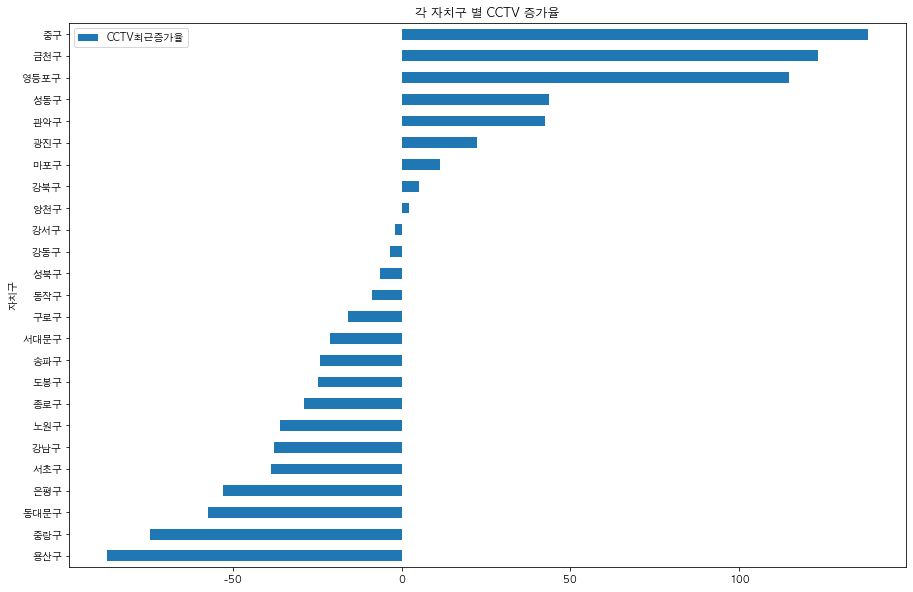

In [15]:
merged_df2 = merged_df.sort_values(by='CCTV최근증가율',ascending = True)
merged_df2.plot(kind='barh',x='자치구',y='CCTV최근증가율',title='각 자치구 별 CCTV 증가율',figsize=(15,10))
plt.show()

In [16]:
merged_df.reset_index(drop=True)
merged_df.set_index('자치구',inplace=True)
merged_df.head()

,인구합계,내국인,외국인,65세이상고령자,외국인비율,고령자비율,CCTV소계,CCTV최근증가율,인구수 대비 CCTV수
자치구,,,,,,,,,
종로구,161984,151217,10767,28073,6.646953,17.330724,1471,-28.954424,0.009081
중구,136469,126175,10294,23794,7.543105,17.435462,1544,138.281250,0.011314
용산구,246165,229579,16586,39439,6.737757,16.021368,2063,-87.234043,0.008381
성동구,307193,299042,8151,44728,2.653381,14.560228,2679,43.806647,0.008721
광진구,365990,350417,15573,48989,4.255034,13.385338,1581,22.434018,0.004320


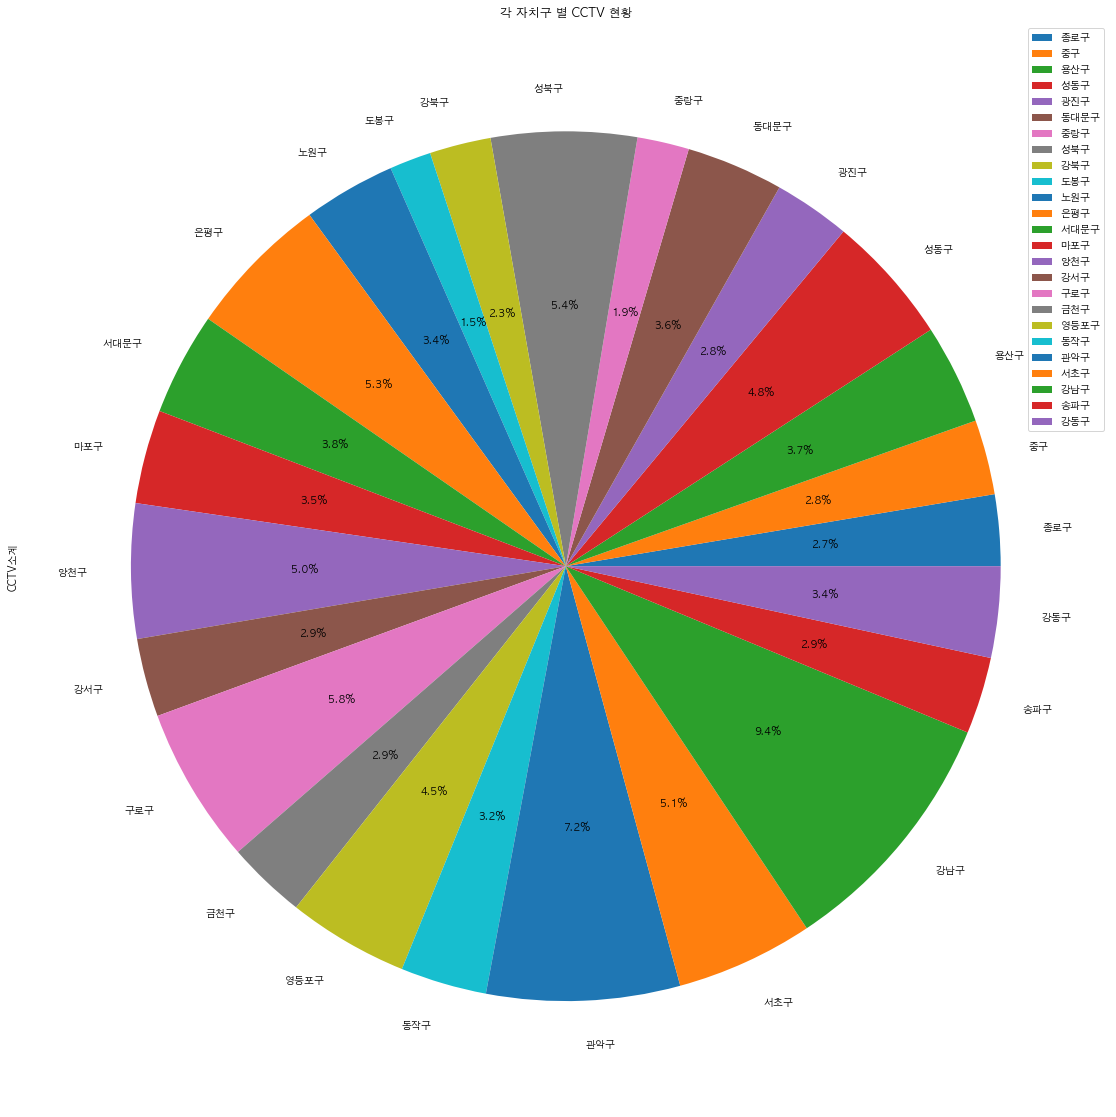

In [17]:
merged_df.plot(kind='pie',y='CCTV소계',figsize=(20,20),title='각 자치구 별 CCTV 현황',legend='best',autopct='%0.1f%%')
plt.show()

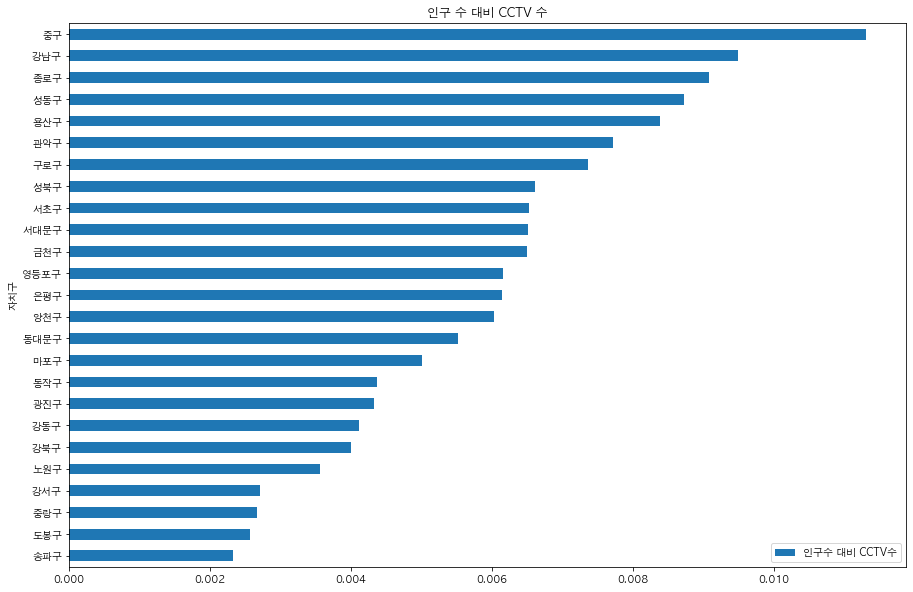

In [21]:
merged_df3 = merged_df.sort_values(by='인구수 대비 CCTV수',ascending = True)
merged_df3
merged_df3.plot(kind='barh', y='인구수 대비 CCTV수',figsize=(15,10),title='인구 수 대비 CCTV 수')
# merged_df3.plot.title('인구 수 대비 CCTV 수', fontsize=20)
plt.show()

- 인구수와 CCTV 댓수의 선점도 및 회귀선

In [22]:
fp1 = np.polyfit(merged_df['인구합계'], merged_df['CCTV소계'], 1)
fp1

array([2.88522756e-03, 1.06403852e+03])

In [23]:
f1 = np.poly1d(fp1)
fx = np.linspace(100000,700000,101)

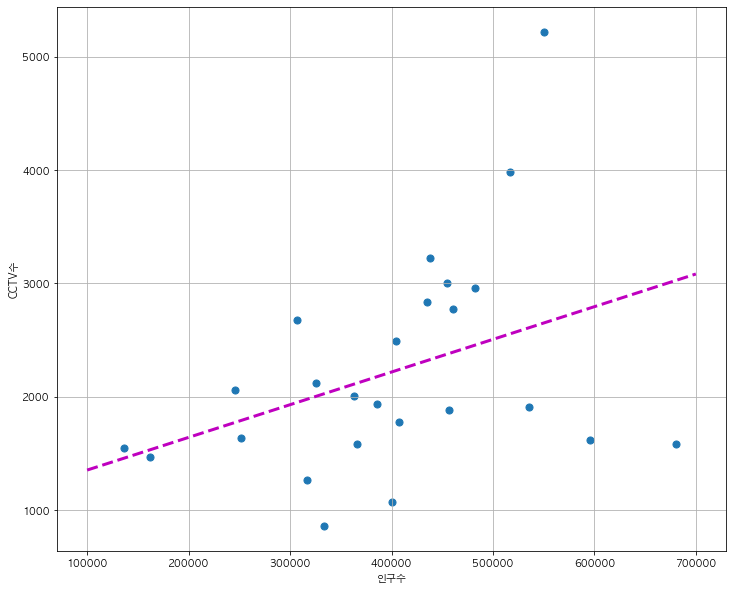

In [24]:
plt.figure(figsize=(12,10))
plt.scatter(merged_df['인구합계'], merged_df['CCTV소계'], s=50)
plt.plot(fx, f1(fx), ls='dashed', lw=3, color='m')
plt.xlabel('인구수')
plt.ylabel('CCTV수')
plt.grid()
plt.show()

- 인구수와 CCTV 댓수의 산점도, 회귀선 및 자치구명

In [25]:
merged_df.head()

,인구합계,내국인,외국인,65세이상고령자,외국인비율,고령자비율,CCTV소계,CCTV최근증가율,인구수 대비 CCTV수
자치구,,,,,,,,,
종로구,161984,151217,10767,28073,6.646953,17.330724,1471,-28.954424,0.009081
중구,136469,126175,10294,23794,7.543105,17.435462,1544,138.281250,0.011314
용산구,246165,229579,16586,39439,6.737757,16.021368,2063,-87.234043,0.008381
성동구,307193,299042,8151,44728,2.653381,14.560228,2679,43.806647,0.008721
광진구,365990,350417,15573,48989,4.255034,13.385338,1581,22.434018,0.004320


In [26]:
merged_df['오차'] = np.abs(merged_df['CCTV소계'] - f1(merged_df['인구합계']))
merged_df.head()

,인구합계,내국인,외국인,65세이상고령자,외국인비율,고령자비율,CCTV소계,CCTV최근증가율,인구수 대비 CCTV수,오차
자치구,,,,,,,,,,
종로구,161984,151217,10767,28073,6.646953,17.330724,1471,-28.954424,0.009081,60.399224
중구,136469,126175,10294,23794,7.543105,17.435462,1544,138.281250,0.011314,86.217357
용산구,246165,229579,16586,39439,6.737757,16.021368,2063,-87.234043,0.008381,288.719435
성동구,307193,299042,8151,44728,2.653381,14.560228,2679,43.806647,0.008721,728.639767
광진구,365990,350417,15573,48989,4.255034,13.385338,1581,22.434018,0.004320,539.002958


In [58]:
merged_df_sort =merged_df.sort_values(by='오차',ascending=False)
merged_df_sort.head(10)

,인구합계,내국인,외국인,65세이상고령자,외국인비율,고령자비율,CCTV소계,CCTV최근증가율,인구수 대비 CCTV수,오차
자치구,,,,,,,,,,
강남구,549898,544804,5094,72602,0.926354,13.202812,5221,-37.954939,0.009494,2570.380612
송파구,680883,674095,6788,89539,0.996941,13.150424,1586,-24.257426,0.002329,1442.540920
관악구,516662,499374,17288,76664,3.346095,14.838328,3985,42.528736,0.007713,1430.274035
도봉구,333495,331238,2257,60023,0.676772,17.998171,858,-24.780702,0.002573,1168.247488
강서구,595703,589302,6401,85992,1.074529,14.435381,1617,-1.939058,0.002714,1165.777237
중랑구,400678,395619,5059,66764,1.262610,16.662757,1068,-74.545455,0.002665,1152.085731
구로구,438308,405837,32471,67432,7.408261,15.384615,3227,-15.868077,0.007362,898.343155
성동구,307193,299042,8151,44728,2.653381,14.560228,2679,43.806647,0.008721,728.639767
강북구,316750,312985,3765,61660,1.188635,19.466456,1265,5.128205,0.003994,712.934353


In [61]:
for n in range(10):
    print(merged_df_sort['인구합계'][n]*1.02)

560895.96
694500.66
526995.24
340164.9
607617.06
408691.56
447074.16000000003
313336.86
323085.0
546204.9


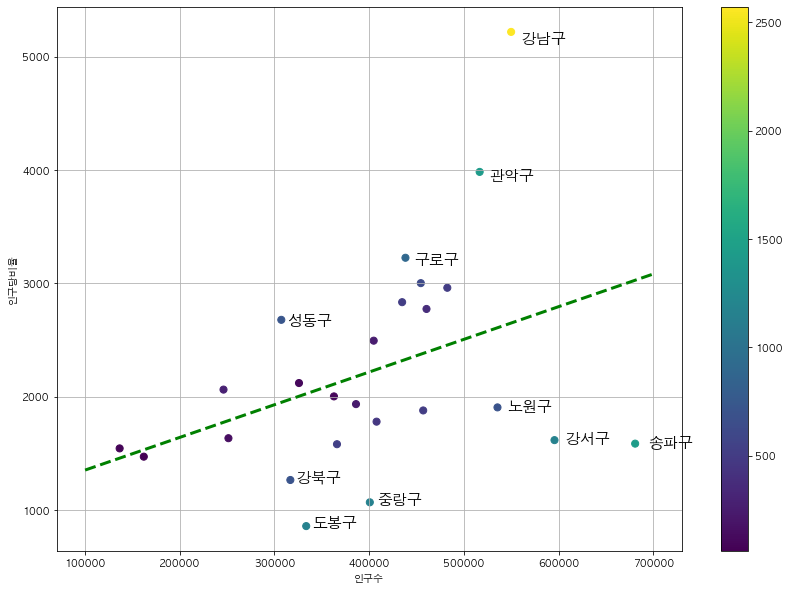

In [63]:
plt.figure(figsize=(14,10))
plt.scatter(merged_df['인구합계'], merged_df['CCTV소계'], c=merged_df['오차'], s=50)
plt.plot(fx, f1(fx), ls='dashed', lw=3, color='g')

for n in range(10):
    plt.text(merged_df_sort['인구합계'][n]*1.02, merged_df_sort['CCTV소계'][n]*0.98, merged_df_sort.index[n], fontsize=15)
    
plt.xlabel('인구수')
plt.ylabel('인구당비율')
plt.colorbar()
plt.grid()
plt.show()